In [75]:
import numpy as np
import torch 
import pandas as pd
import pickle
import time
import sys
import itertools
import pandas as pd

import matplotlib.pyplot as plt
from tueplots import axes, bundles
plt.rcParams.update({"figure.dpi": 150})

# bundles.icml2022(family="sans-serif", usetex=False, column="full", nrows=2)
plt.rcParams.update(bundles.icml2022(family="sans-serif", usetex=False, column="full", nrows=2)
)

In [76]:
trait = "pn"
base_path = "./output/3.29.2024"

In [77]:
names = {"narea": "Narea", "sla": "SLA", "ps": "PLSR_SLA_Sorghum", "pn": "FS_PLSR_Narea"}

In [78]:
#Double check that data files exist
#Missing files cannot be plotted
seeds = 5
for acq_name in ["EI", "PI", "UCB-0.1", "UCB-0.2", "UCB-0.5", "KG"]:
    for kernel_name in ["matern52", "matern32", "rbf", "matern12", "spectral-10"]:
        for trait in [trait]:
            trait = trait.lower()
            try:
                _results = [pd.read_csv(f"{base_path}/{trait}/botorch{acq_name}_{kernel_name}_result_{seed}.npy", encoding='utf-8') for seed in range(seeds)]
            except Exception:
                print(f"File Missing: {base_path}/{trait}/botorch{acq_name}_{kernel_name}_result_x.npy")
                pass

File Missing: ./output/3.29.2024/pn/botorchKG_matern52_result_x.npy
File Missing: ./output/3.29.2024/pn/botorchKG_matern32_result_x.npy
File Missing: ./output/3.29.2024/pn/botorchKG_rbf_result_x.npy
File Missing: ./output/3.29.2024/pn/botorchKG_matern12_result_x.npy
File Missing: ./output/3.29.2024/pn/botorchKG_spectral-10_result_x.npy


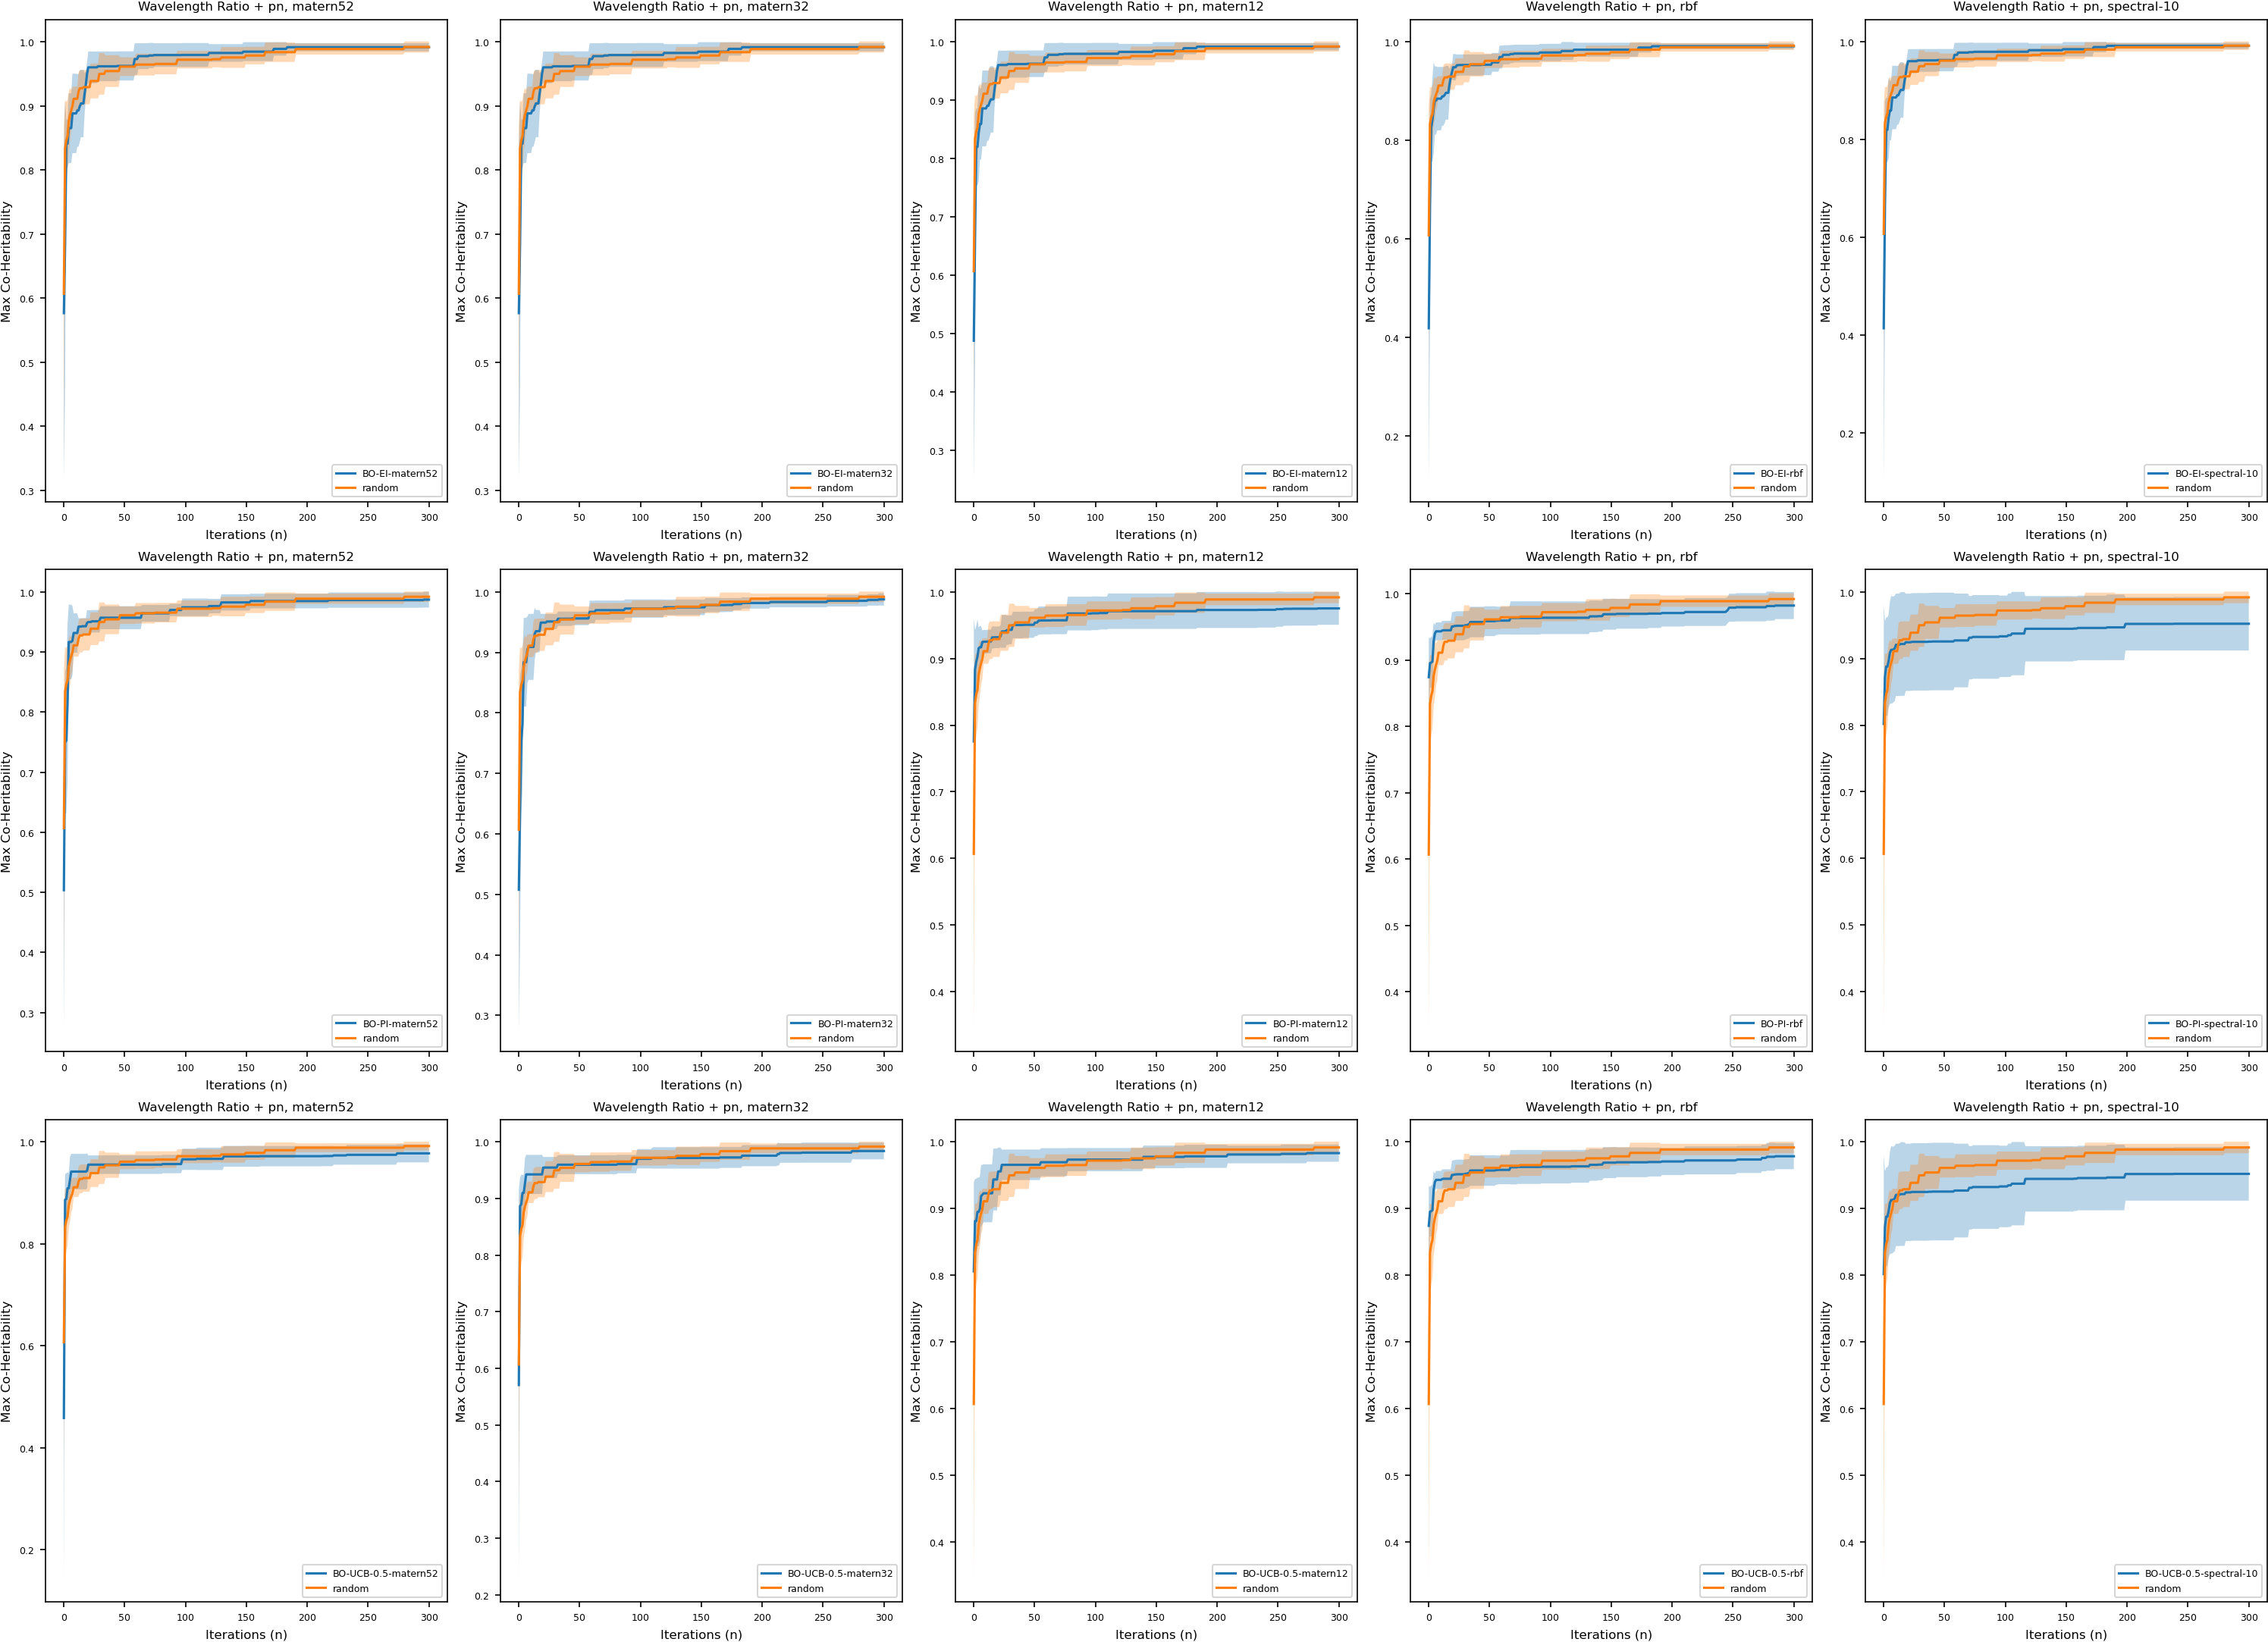

In [79]:
trait = trait
alpha = 0.2
seeds = [0,1,2,3,4]

# kernels = ["matern12", "matern12"]#["matern52", "matern32", "matern12", "rbf", "spectral-10"] #, "spectral-4"]
# acqs = ["EI", "EI"] #["EI", "PI", "UCB-0.1", "UCB-0.2", "UCB-0.5"]

kernels = ["matern52", "matern32", "matern12", "rbf", "spectral-10"] #, "spectral-4"]
acqs = ["EI", "PI", "UCB-0.5"]#"UCB-0.1", "UCB-0.2", "UCB-0.5"]


fig, axs = plt.subplots(len(acqs), len(kernels), figsize=(20, 14.5))
color_dict = {"EI": 'Pink', "PI": 'Blue', "KG": 'Green', 
              "UCB": 'Orange', "UCB-0.1": 'Red', "UCB-0.2": 'Green', "UCB-0.5": 'Orange'}

#BAYESIAN OPTIMIZATION
for a, acq_name in enumerate(acqs):
    for k, kernel_name in enumerate(kernels):
        botorch_results = [pd.read_csv(f"{base_path}/{trait}/botorch{acq_name}_{kernel_name}_result_{seed}.npy", encoding='utf-8')["Best"] for seed in seeds]
        botorch_results = [np.array(botorch_results[i]) for i in range(0,len(botorch_results))]
        mean, var = np.mean(botorch_results, axis=0), np.std(botorch_results, axis=0)
        x_axis = np.linspace(0, len(mean), len(mean))

        color = color_dict[acq_name]
        axs[a, k].plot(x_axis, mean, label= f"BO-{acq_name}-{kernel_name}") #, color=color)
        axs[a, k].fill_between(x_axis, mean - var,  mean + var, alpha=0.3) #, color=color)

        #plot random
        botorch_results = [pd.read_csv(f"{base_path}/{trait}/botorchrandom_result_{seed}.npy", encoding='utf-8')["Best"] for seed in seeds]
        botorch_results = [np.array(botorch_results[i]) for i in range(0,len(botorch_results))]
        mean, var = np.mean(botorch_results, axis=0), np.std(botorch_results, axis=0)
        axs[a, k].plot(x_axis, mean, label= f"random") #, color="black")
        axs[a, k].fill_between(x_axis, mean - var,  mean + var, alpha=0.3) #, color="black")

        # #graph elements
        # plt.plot([actual_max[trait]]*its ,linestyle='dashed', label="Best Co-heritabilty")
        # plt.plot ([top_01[trait]]*its ,linestyle='dashed', label="Top 1%")

        axs[a, k].set_title(f"Wavelength Ratio + {trait}, {kernel_name}") 
        axs[a, k].set_xlabel("Iterations (n)") 
        axs[a, k].set_ylabel("Max Co-Heritability")
        axs[a, k].legend(loc="lower right")
        #axs[a, k].set_ylim(0,1)

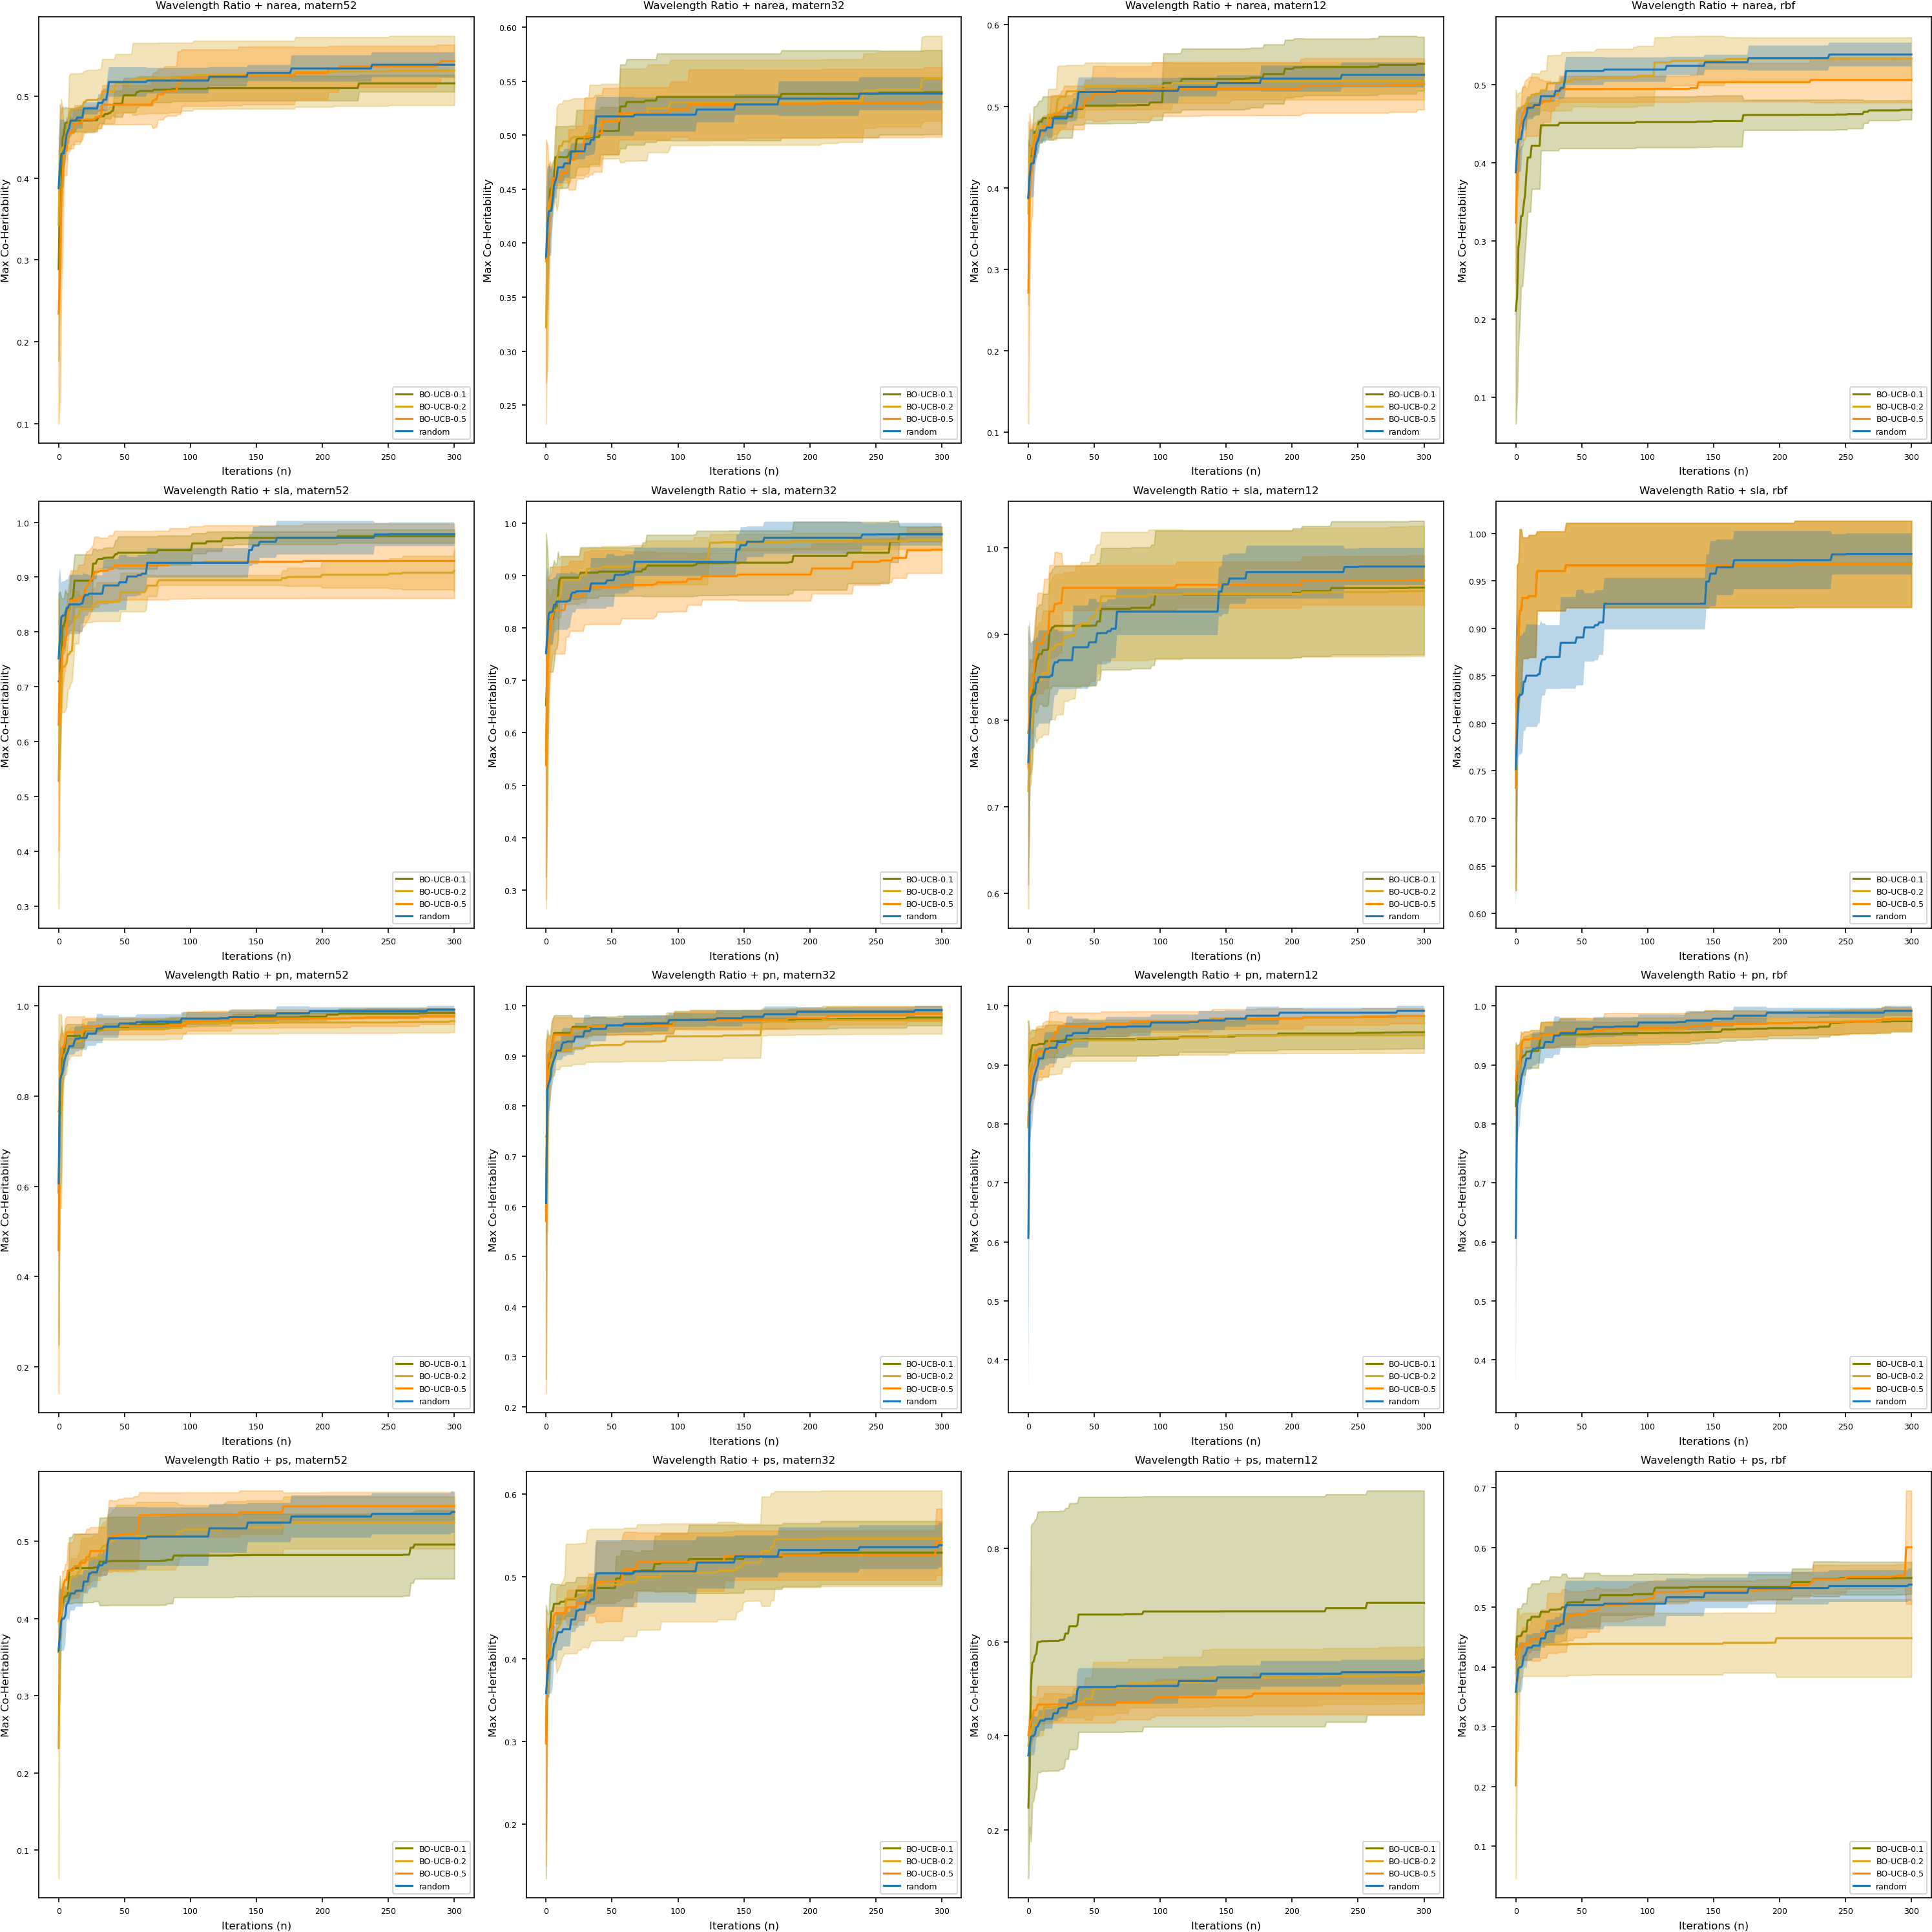

In [81]:
alpha = 0.2
seeds = [0,1,2,3,4]

#its = 300 #current maximum iterations i have ran....
#x = np.linspace(0, its, its)

# kernels = ["matern12", "matern12"]#["matern52", "matern32", "matern12", "rbf", "spectral-10"] #, "spectral-4"]
# acqs = ["EI", "EI"] #["EI", "PI", "UCB-0.1", "UCB-0.2", "UCB-0.5"]

traits = ["narea", "sla", "pn", "ps"]
kernels = ["matern52", "matern32", "matern12", "rbf"]#, "spectral-10"] #, "spectral-4"]
acqs = ["UCB-0.1", "UCB-0.2", "UCB-0.5"]


with plt.rc_context(bundles.icml2022(family="sans-serif", usetex=False, column="full", nrows=2)):
    fig, axs = plt.subplots(len(traits), len(kernels), figsize=(20, 20))
    color_dict = {"EI": 'Pink', "PI": 'Blue', "KG": 'Green', 
                  "UCB": 'Orange', "UCB-0.1": 'Olive', "UCB-0.2": 'goldenrod', "UCB-0.5": 'darkorange'}

    #BAYESIAN OPTIMIZATION
    for t, trait in enumerate(traits):
        for k, kernel_name in enumerate(kernels):
            for a, acq_name in enumerate(acqs):
                botorch_results = [pd.read_csv(f"{base_path}/{trait}/botorch{acq_name}_{kernel_name}_result_{seed}.npy", encoding='utf-8')["Best"] for seed in seeds]
                botorch_results = [np.array(botorch_results[i]) for i in range(0,len(botorch_results))]
                mean, var = np.mean(botorch_results, axis=0), np.std(botorch_results, axis=0)
                x_axis = np.linspace(0, len(mean), len(mean))

                color = color_dict[acq_name]
                axs[t, k].plot(x_axis, mean, label= f"BO-{acq_name}", color=color)
                axs[t, k].fill_between(x_axis, mean - var,  mean + var, alpha=0.3, color=color)

                # #graph elements
                # plt.plot([actual_max[trait]]*its ,linestyle='dashed', label="Best Co-heritabilty")
                # plt.plot ([top_01[trait]]*its ,linestyle='dashed', label="Top 1%")

            #plot random
            botorch_results = [pd.read_csv(f"{base_path}/{trait}/botorchrandom_result_{seed}.npy", encoding='utf-8')["Best"] for seed in seeds]
            botorch_results = [np.array(botorch_results[i]) for i in range(0,len(botorch_results))]
            mean, var = np.mean(botorch_results, axis=0), np.std(botorch_results, axis=0)
            axs[t, k].plot(x_axis, mean, label= "random")#, color="black")
            axs[t, k].fill_between(x_axis, mean - var,  mean + var, alpha=0.3)#, color="black")

            axs[t, k].set_title(f"Wavelength Ratio + {trait}, {kernel_name}") #, fontsize=12)
            axs[t, k].set_xlabel("Iterations (n)") #, fontsize=10)
            axs[t, k].set_ylabel("Max Co-Heritability") #, fontsize=10)
            axs[t, k].legend(loc="lower right") #, fontsize=11)
